In [21]:
# librerie necessarie
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

In [22]:
# Problema con librerie che usano OpenMP:
# in alcuni ambienti, PyTorch e NumPy possono caricare versioni diverse di OpenMP,
# generando conflitti. Questa istruzione risolve l’errore "KMP_DUPLICATE_LIB_OK".
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [ ]:
# percorso base e percorso dataset
base_dir = os.getcwd()
data_dir= os.path.join(base_dir, 'data_histo')

# cartella di salvataggio
output_folder = os.path.join(base_dir, 'outputs')
os.makedirs(output_folder, exist_ok=True) # crea se non esiste
image_output_path = os.path.join(output_folder, "train_batch_sample.png")

In [ ]:
# # Trasformazioni
transform = transforms.Compose([
    transforms.Resize((768, 768)),   # Il dataset sembra ben organizzato con immagini di dimensioni uniformi,
                                     # ma ridimensioniamo comunque per sicurezza
    transforms.ToTensor(),           # Conversione in tensore PyTorch
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalizzazione standard per immagini RGB
])

In [ ]:
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform) # caricamento dataset e applicazione trasformazioni

In [26]:
# divisione in train/val/test
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # per evitare arrotondamenti

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)  # seed per riproducibilità
)

In [27]:
# dataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [28]:
# classi (ImageFolder le ordina in ordine alfabetico)
print("Classi:", full_dataset.classes)

pretty_classes = ['Adenocarcinoma', 'Benigno', 'Squamoso'] # nome delle classi più leggibili

Classi: ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']


In [29]:
# funzione per visualizzare una porzione n di un batch di immagini
def show_batch(loader, classes, n=8, save_path=None):
    images, labels = next(iter(loader))
    plt.figure(figsize=(12, 8))
    for i in range(min(n, len(images))):
        ax = plt.subplot(2, 4, i + 1)
        img = images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5  # de-normalizzazione
        plt.imshow(img)
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Batch salvato in: {save_path}")
    
    plt.show()


Batch salvato in: c:\Users\noemi\Documents\GitHub\DAML-project\outputs\train_batch_sample.png


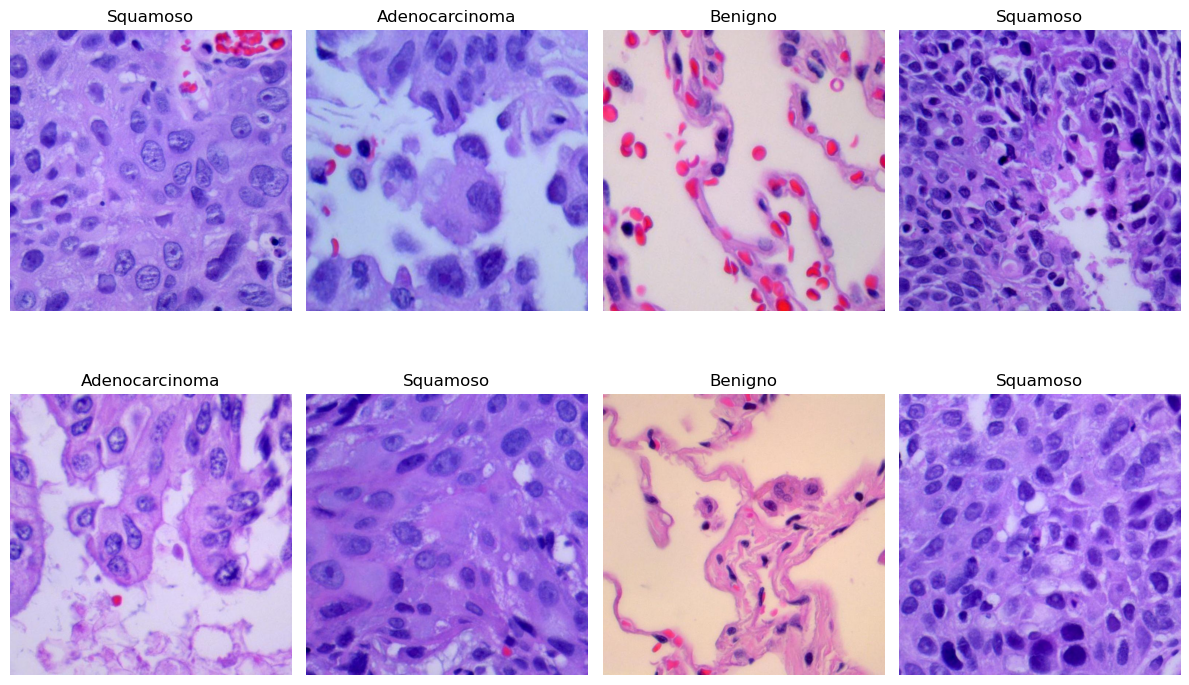

In [30]:
# visualizza porzione n di un batch di immagini dal train set
show_batch(train_loader, pretty_classes, n=8, save_path=image_output_path)